In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

Dx=1
U=1
T = 1000
Dt = 1.0
n_plot = 1
Initial_Condition = "gaussian"
Boundary_Condition = "clamped"
Discretization = "Ct_Cs"

n_timesteps = T/Dt + 1

# Create grid
x = np.arange(0,200,Dx)

# Set initial condition
u = np.zeros([200, int(n_timesteps)])

#u_initial = u

if Initial_Condition=="tophat":
    u[(6>x) & (x>=5),0]=1
elif Initial_Condition=="wave":
    u[(20>x) & (x>=5),0]=np.sin(np.pi*x[(20>x) & (x>=5)]/20)
    u[x<5,0]=np.sin(np.pi*x[x<5]/5)
elif Initial_Condition=="gaussian":
    gaussian_width = 5
    gaussian_center = 20
    gaussian_start = gaussian_center - 3*gaussian_width
    gaussian_end = gaussian_center + 3*gaussian_width
    u[gaussian_start:gaussian_end,0] = gaussian_width**2./( (x[gaussian_start:gaussian_end] - gaussian_center)**2 + gaussian_width**2 )

<IPython.core.display.Javascript object>


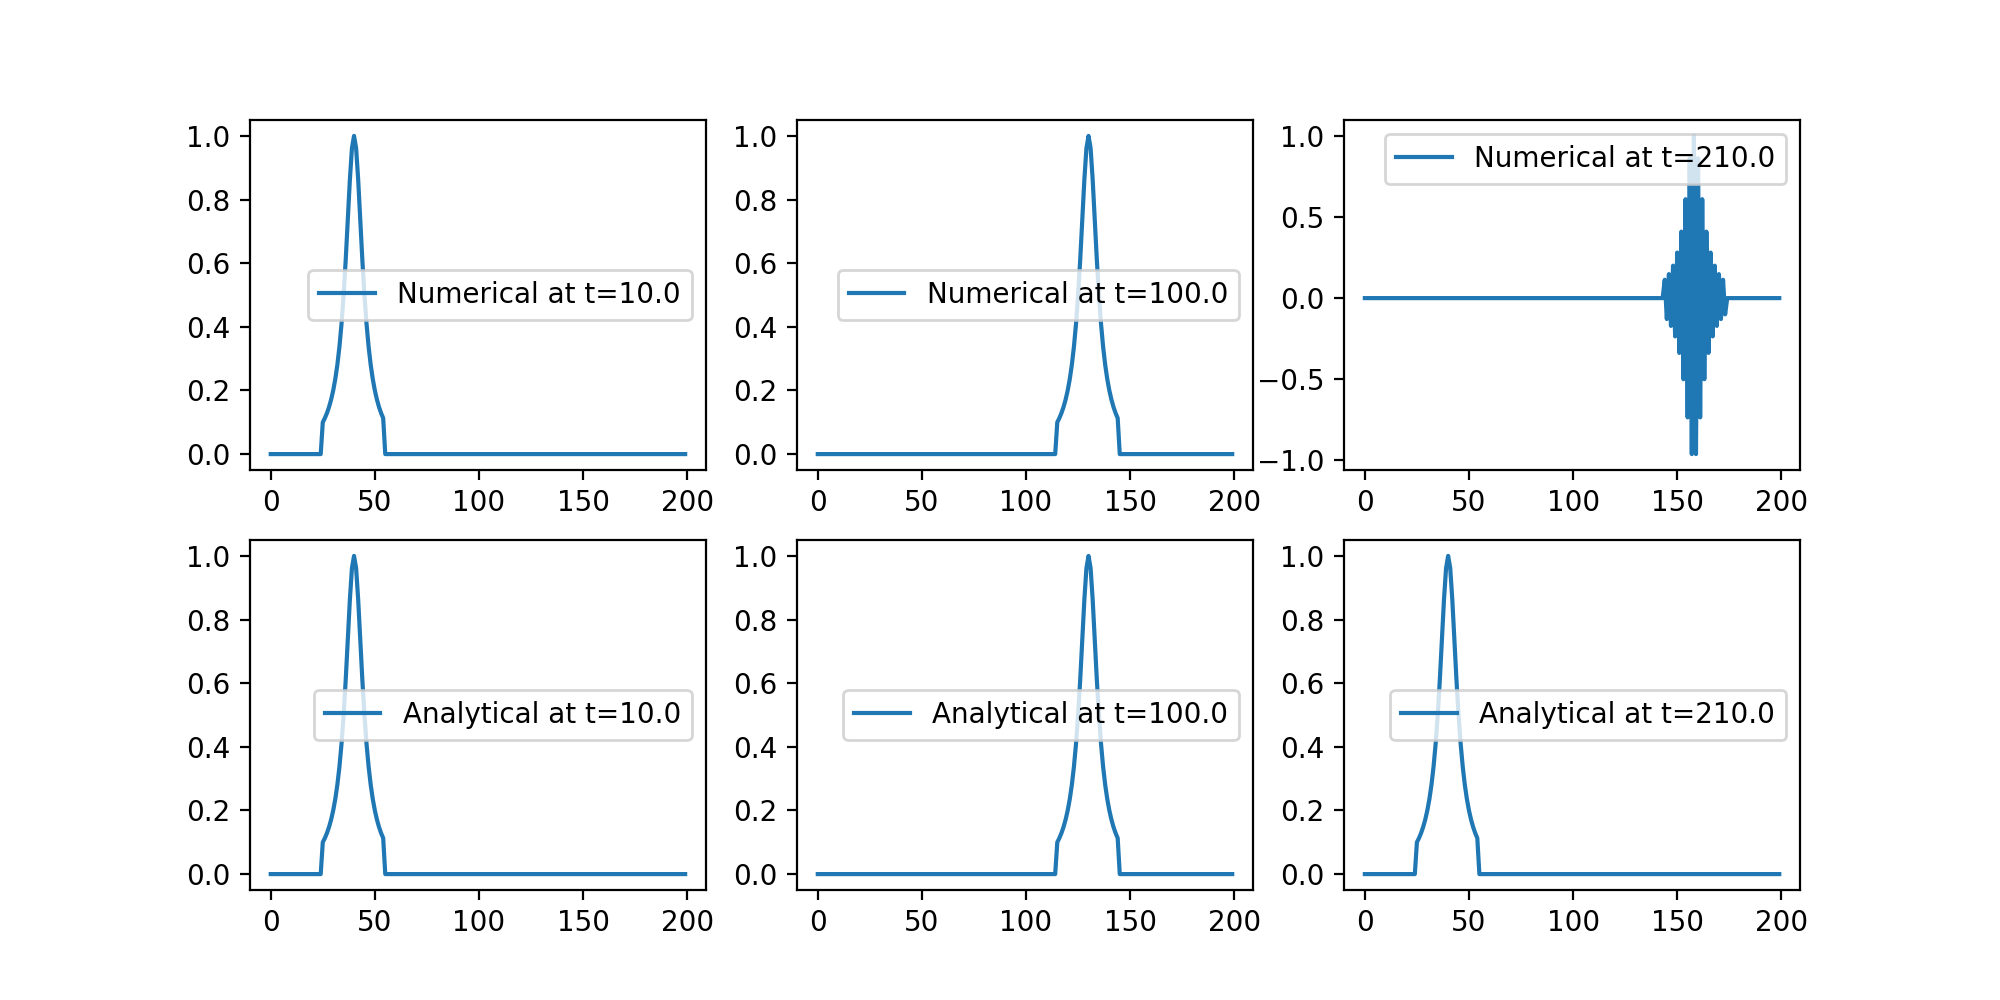

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, axs = plt.subplots(2, 3)
xpos=0
ypos=0

for time_step in range(1,int(n_timesteps)):
    time = time_step*Dt
    
    # Apply different advection scheme options
    # Centered time - Centered space
    if Discretization=="Ct_Cs":
        if time_step==1:
            if Initial_Condition=="tophat":
                u[(6+U*time>x) & (x>=5+U*time),1]=1
            elif Initial_Condition=="wave":
                u[(20+U*time>x) & (x>=5+U*time),1]=np.sin(np.pi*x[(20+U*time>x) & (x>=5+U*time)]/20)
                u[x<5+U*time,1]=np.sin(np.pi*x[x<5+U*time]/5)
            elif Initial_Condition=="gaussian":
                u[gaussian_start+int(np.floor(U*time)):gaussian_end+int(np.floor(U*time)),1] = ( 
                    gaussian_width**2./( (x[gaussian_start:gaussian_end] - gaussian_center)**2 + gaussian_width**2 ) )
        else:
            if Boundary_Condition=="clamped":
                u[1:-1,time_step] = u[1:-1,time_step-2] - (U*Dt/Dx)*(np.roll(u[:,time_step-1],-1)[1:-1] - np.roll(u[:,time_step-1],1)[1:-1])
            elif Boundary_Condition=="periodic":
                u[:,time_step] = u[:,time_step-2] - (U*Dt/Dx)*(np.roll(u[:,time_step-1],-1) - np.roll(u[:,time_step-1],1))
    
    # Uncentered time - Uncentered space
    if Discretization=="Ut_Us":
        if Boundary_Condition=="clamped":
            u[1:-1,time_step] = u[1:-1,time_step-1] - (U*Dt/Dx)*(u[1:-1,time_step-1] - np.roll(u[:,time_step-1],1)[1:-1])
        elif Boundary_Condition=="periodic":
            u[:,time_step] = u[:,time_step-1] - (U*Dt/Dx)*(u[:,time_step-1] - np.roll(u[:,time_step-1],1))
    
    # Uncentered time - Centered space
    if Discretization=="Ut_Cs":
        if Boundary_Condition=="clamped":
            u[1:-1,time_step] = u[1:-1,time_step-1] - (U*Dt/(2*Dx))*(np.roll(u[:,time_step-1],-1)[1:-1] - np.roll(u[:,time_step-1],1)[1:-1])
        elif Boundary_Condition=="periodic":
            u[:,time_step] = u[:,time_step-1] - (U*Dt/(2*Dx))*(np.roll(u[:,time_step-1],-1) - np.roll(u[:,time_step-1],1))

    if (time==10) or (time==100) or (time==210):
        axs[ypos,xpos].plot(x, u[:,time_step],label="Numerical at t={}".format(time))
        axs[ypos,xpos].legend()
        ypos=ypos+1
        u_analytical = np.zeros(200)
        if Initial_Condition=="tophat":
            u_analytical[(6+U*time>x) & (x>=5+U*time)]=1
        elif Initial_Condition=="wave":
            u_analytical[(20+U*time>x) & (x>=5+U*time)]=np.sin(np.pi*((x[(20+U*time>x) & (x>=5+U*time)])-U*time)/20)
            u_analytical[(U*time<=x) & (x<5+U*time)]=np.sin(np.pi*(x[x<5]-U*time)/5)
        elif Initial_Condition=="gaussian":
            u_analytical = np.roll(u[:,0],int(np.floor(U*time)) )
        axs[ypos,xpos].plot(x, u_analytical,label="Analytical at t={}".format(time))
        axs[ypos,xpos].legend()
        xpos = xpos+1
        ypos = ypos-1
        
        
plt.show()

<IPython.core.display.Javascript object>


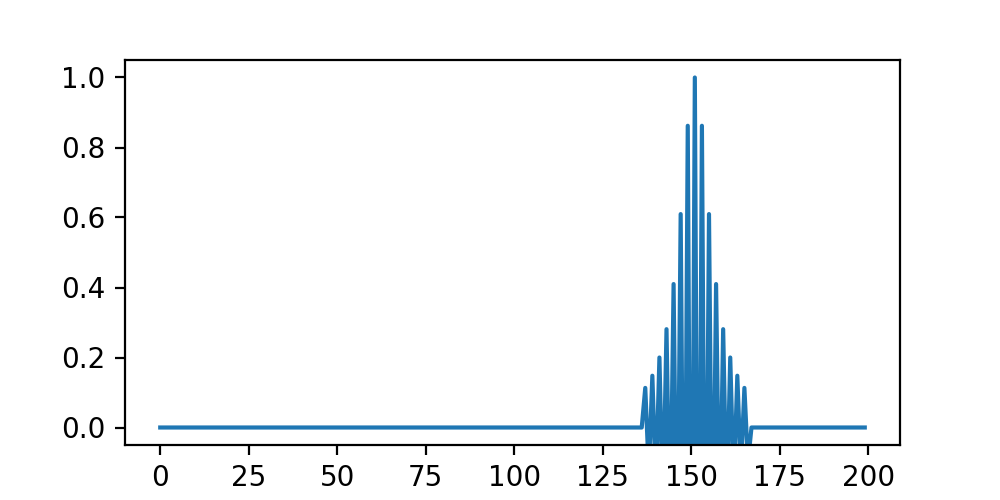

In [3]:
plt.rcParams['figure.figsize'] = [5, 2.5]
fig, ax = plt.subplots()

line, = ax.plot(x, u[:,0])

def animate(i):
    line.set_ydata(u[:,i])  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=1000, interval=1, save_count=50)
plt.show()

In [4]:
gaussian_end+np.floor(U*time)

1045.0